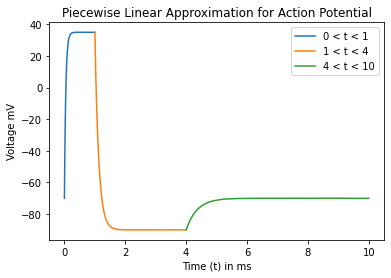

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

'''
Defining v_prime 
'''

def V_prime(g_na, g_k, v):
    dvdt = -4*(g_na*(v - 50) + g_k*(v + 90))
    return dvdt

'''
Using the built in lambda function to set up the ODE solver
'''

F = lambda t, v: V_prime(5.0, 0.6, v)
G = lambda t, v: V_prime(0.0, 2.0, v)
H = lambda t, v: V_prime(0.1, 0.6, v)

'''
Setting up approriate time intervals and solving the ODE using the inital value solver
'''

t_eval_1 = np.linspace(0.0, 1.0, 100)
t_eval_2 = np.linspace(1, 4, 100)
t_eval_3 = np.linspace(4, 10, 100)

sol_1 = solve_ivp(F, [0,1], [-70], t_eval=t_eval_1)
sol_2 = solve_ivp(G, [1, 4], [35], t_eval=t_eval_2)
sol_3 = solve_ivp(H, [4, 10], [-90], t_eval=t_eval_3)

'''
Plotting the solutions
'''

plt.figure()
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.ylabel('Voltage mV')
plt.xlabel('Time (t) in ms')
plt.title('Piecewise Linear Approximation for Action Potential')
plt.legend(['0 < t < 1', '1 < t < 4', '4 < t < 10' ])
plt.show()